# SPICED Academy ///  Project Week 04 /// Web Scraping and Text Processing

***

## I. Define goal

The goal of this project is to develop a text classifier that predicts the probability of a song being rightously classified to a certain artist, in this case MacMiller and James Blake. Those two artist were picked because they are my current favourite musicians. In concrete, the albums "Friends that break your heart" (by James Blake) and "Circles" (by Mac Miller) were compared. 

***

## II. Import libraries 

In [1]:
#data processing and general
import pandas as pd
import json
import pprint

#web scraping
import api_key
import lyricsgenius as genius
import re

#feature engineering
import nltk 
from nltk.tokenize import TreebankWordTokenizer 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#machine learning models
from sklearn.naive_bayes import MultinomialNB

#metrics
import sklearn.metrics as metrics

***

## III. Import and transform data

*Requesting access from Genius*

In [2]:
#access token from Genius
client_access_token = api_key.your_client_access_token
genius = genius.Genius(client_access_token)

***

*Understanding the functionalities of LyricsGenius*

In [ ]:
#accessing a couple of songs from James Blake
#JamesBlake = genius.search_artist("James Blake", 6)

In [ ]:
#printing the song lyrics
#for song in JamesBlake.songs:
    #print(song.lyrics)

In [3]:
#searching for one specific song
song = genius.search_song("James Blake", "Famous last words")

Searching for "James Blake" by Famous last words...
Done.


In [ ]:
#printing the lyrics of "Limit to your love" by "James Blake"
#song.lyrics

<font color = 'blue'> Summary of LyricsGenius </font> In order to use the lyrics for the machine learning model, the text has to be cleaned. In concrete, `\n` and word phrases like `[Verse 1]` have to be filtered out.

***

*Accessing the albums "Friends that break your heart" by James Blake and "Circles" by Mac Miller*

In [ ]:
#saving the lyrics of the album "Friends that break your heart" by "James Blake" as json file
#album = genius.search_album("Friends that break your heart", "James Blake")
#album.save_lyrics

In [ ]:
#saving the lyrics of the album "Circles" by "Mac Miller" as json file
#album = genius.search_album("Circles", "Mac Miller")
#album.save_lyrics

***

*Converting the json files into dataframes (James Blake)*

In [5]:
#opening the json files
with open('Lyrics_FriendsThatBreakYourHeart.json', 'r') as read_file:
    jamesblake_json = json.load(read_file)

In [ ]:
#understanding the structure of the json file
#pprint.pprint(jamesblake_json['tracks'][0]['song']['lyrics'])

In [ ]:
#understanding the structure of the json file
#pprint.pprint(jamesblake_json['tracks'][0])

In [6]:
#writing an empty list
list_jamesblake = []

In [7]:
#slicing out the lyrics and the artist's name and fill them into the empty list
for track in jamesblake_json['tracks']:
    X = track['song']['lyrics']
    y = track['song']['artist']
    list_jamesblake.append([X,y])

In [ ]:
#inspecting the filled list
#list_jamesblake

In [8]:
#creating a dataframe from the list
df_jamesblake = pd.DataFrame(list_jamesblake, columns=['X', 'y'])
df_jamesblake

,X,y
0,[Verse 1]\nAnd I can't believe I'm still talki...,James Blake
1,[Intro]\nDaytrip took it to ten (Hey)\n\n[Vers...,James Blake
2,[Intro: James Blake]\nCan't stick to that\nCan...,James Blake
3,[Verse 1]\nI hold my ear to a shell\nI hear so...,James Blake
4,[Intro: James Blake]\nI've been losing all of ...,James Blake
5,"[Pre-Chorus]\nLover, is it alright, the way it...",James Blake
6,"[Intro]\nMetro\n\n[Verse 1]\nIt was built, in ...",James Blake
7,[Chorus]\nShow me\nI wish you'd show me\nShow ...,James Blake
8,"[Intro]\nYeah, alright (Woo-hoo)\nTwo, three\n...",James Blake
9,[Intro]\nWhatever makes you\nWhatever makes yo...,James Blake


***

*Converting the json files into dataframes (Mac Miller)*

In [9]:
#opening the json files
with open('Lyrics_Circles.json', 'r') as read_file:
    macmiller_json = json.load(read_file)

In [ ]:
#understanding the structure of the json file
#pprint.pprint(macmiller_json['tracks'][0]['song']['lyrics'])

In [ ]:
#understanding the structure of the json file
#pprint.pprint(macmiller_json['tracks'][0])

In [10]:
#writing an empty list
list_macmiller = []

In [11]:
#slicing out the lyrics and the artist's name and fill them into the empty list
for track in macmiller_json['tracks']:
    X = track['song']['lyrics']
    y = track['song']['artist']
    list_macmiller.append([X,y])

In [12]:
#inspecting the filled list
#list_macmiller

In [13]:
#creating a dataframe from the list
df_macmiller = pd.DataFrame(list_macmiller, columns=['X', 'y'])

***

In [14]:
#concate both dataframes
frames = [df_jamesblake, df_macmiller]
df = pd.concat(frames)
df

,X,y
0,[Verse 1]\nAnd I can't believe I'm still talki...,James Blake
1,[Intro]\nDaytrip took it to ten (Hey)\n\n[Vers...,James Blake
2,[Intro: James Blake]\nCan't stick to that\nCan...,James Blake
3,[Verse 1]\nI hold my ear to a shell\nI hear so...,James Blake
4,[Intro: James Blake]\nI've been losing all of ...,James Blake
5,"[Pre-Chorus]\nLover, is it alright, the way it...",James Blake
6,"[Intro]\nMetro\n\n[Verse 1]\nIt was built, in ...",James Blake
7,[Chorus]\nShow me\nI wish you'd show me\nShow ...,James Blake
8,"[Intro]\nYeah, alright (Woo-hoo)\nTwo, three\n...",James Blake
9,[Intro]\nWhatever makes you\nWhatever makes yo...,James Blake


***

## IV. Feature Engineering

*Cleaning the dataframe*

In [15]:
#cleaning the dataframe
df['X'] = df['X'].str.replace('\n',' ', regex = True) #removes all newlines 
df['X'] = df['X'].str.replace(',',' ', regex = True) #removes all commas
df['X'] = df['X'].str.replace(r"\(.*\)"," ") #removes brackets and everything that is inside of it
df['X'] = df['X'].str.replace(r"\[.*\]"," ") #removes squared brackets and everything that is inside of it
df['X'] = df['X'].str.lower() #lowers all words in X
df['y'] = df['y'].str.lower() #lowers all words in y
df['y'] = df['y'].str.replace(' ','', regex = True) #removes the whitespace in y
df.reset_index(drop=True, inplace=True) #reseting the index

/var/folders/n_/f0kktvdx00s93tvvh3xlcch40000gn/T/ipykernel_10066/2621719809.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['X'] = df['X'].str.replace(r"\(.*\)"," ") #removes brackets and everything that is inside of it
/var/folders/n_/f0kktvdx00s93tvvh3xlcch40000gn/T/ipykernel_10066/2621719809.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['X'] = df['X'].str.replace(r"\[.*\]"," ") #removes squared brackets and everything that is inside of it


***

*Tokenization*

In [16]:
#instantiate TreebankWordTokenizer
nltk = TreebankWordTokenizer() 

In [17]:
#transform X into tokens / James Blake
df['X'] = df['X'].apply(nltk.tokenize)
df

,X,y
0,"[ooh, you, 're, the, last, ooh, you, 're, the,...",jamesblake
1,"[life, is, not, the, same, if, we, 're, miles,...",jamesblake
2,"[so, i, 'm, coming, back, coming, back, tail, ...",jamesblake
3,"[and, i, know, this, feeling, too, well, of, b...",jamesblake
4,"[yes, i, wo, n't, lie, just, come, closer, you...",jamesblake
5,"[i, 'm, so, blessed, you, 're, mine, i, 'm, so...",jamesblake
6,"[and, it, 's, okay, i, know, i, 'll, be, repla...",jamesblake
7,"[show, me, i, wish, you, 'd, show, me, show, me]",jamesblake
8,"[yeah, alright]",jamesblake
9,"[i, fell, right, in, i, fell, right, in, with,...",jamesblake


***

*Lemmatization*

In [18]:
#import wordnet
#nltk.download()

In [19]:
#define function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join(lemmatizer.lemmatize(token) for token in text)

In [20]:
#lematize all colomns of every df_artist
df['X'] = df['X'].apply(lemmatize_text)
df.head()

,X,y
0,ooh you 're the last ooh you 're the last of m...,jamesblake
1,life is not the same if we 're mile away i wa ...,jamesblake
2,so i 'm coming back coming back tail between m...,jamesblake
3,and i know this feeling too well of being aliv...,jamesblake
4,yes i wo n't lie just come closer you 'd think...,jamesblake


In [21]:
#transform the dataframe series into lists
X = df['X'].to_list()
y = df['y'].to_list()

***

*TfidfVectorizer*

In [22]:
#defining stopwords
stopwords = stopwords.words('english')

In [23]:
#instanciate TfidVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [24]:
#fit & transform X_artist 
X = vectorizer.fit_transform(X)
X

<24x161 sparse matrix of type '<class 'numpy.float64'>'
	with 211 stored elements in Compressed Sparse Row format>

***

## V. Splitting the data in train, validation and test data

*Splitting the data*

In [25]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 25) # 0.25 x 0.8 = 0.2

In [26]:
X_train.shape

(14, 161)

In [27]:
#checking if the splitting worked
y_train

['macmiller',
 'macmiller',
 'jamesblake',
 'macmiller',
 'jamesblake',
 'jamesblake',
 'jamesblake',
 'macmiller',
 'macmiller',
 'macmiller',
 'jamesblake',
 'jamesblake',
 'macmiller',
 'jamesblake']

***

## VI. Classification Model 

*Applying a Naive Bayes model*

In [28]:
#applying 
m = MultinomialNB() 

In [29]:
#train the model 
m.fit(X_train, y_train)

MultinomialNB()

In [30]:
#test the model score
m.score(X_train, y_train)

0.9285714285714286

In [31]:
#test the model score
m.score(X_val, y_val)

0.6

In [32]:
y_pred = m.predict(X_val)

***

*Metrics scores*

In [33]:
#accuracy
round(metrics.accuracy_score(y_val, y_pred),2)

0.6

In [34]:
#precision
round(metrics.precision_score(y_val, y_pred, pos_label='macmiller'), 2)

0.67

In [35]:
#recall
round(metrics.recall_score(y_val, y_pred,pos_label='macmiller'), 2)

0.67

In [36]:
#f1
round(metrics.f1_score(y_val, y_pred, pos_label='macmiller'), 2)

0.67

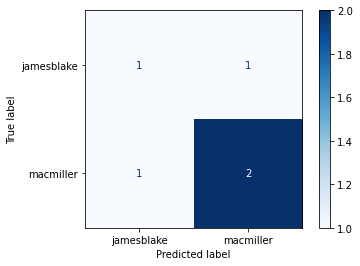

In [37]:
#applying a confusion matrix 
metrics.confusion_matrix(y_val, y_pred)
metrics.plot_confusion_matrix(m, X_val, y_val, cmap='Blues')

***

## VII. Calculate test-score

*Calculating the model scores for all data sets*

In [38]:
#calculating the model score using y_test
round(m.score(X_test, y_test),2)

0.4

In [39]:
y_pred = m.predict(X_test)

***

*Metrics scores*

In [40]:
#accuracy
round(metrics.accuracy_score(y_test, y_pred),2)

0.4

In [41]:
#precision
round(metrics.precision_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

In [42]:
#recall
round(metrics.recall_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

In [43]:
#f1
round(metrics.f1_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

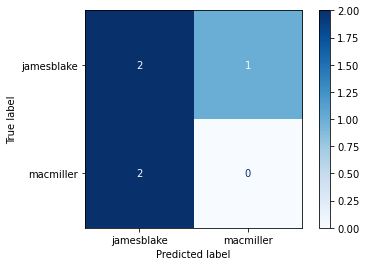

In [44]:
#applying a confusion matrix 
metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(m, X_test, y_test, cmap='Blues')

<font color = 'blue'> Summary of Naive Bayes Model </font> Interestingly, the scores of the model always change dramatically depending the random state. As the data sample is so small (approximatley 12 songs for each artists), the high variance is also not surprising. 

***

## VIII. Calculating the probability of unseen lyrics

In [45]:
#creating a new dataset //// using the lyrics from 'limit to your love' by James Blake 
unseen_data = ['There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love Your love your love your love There s a limit to you care So carelessly there is it truth or dare There s a limit to your care There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love']
unseen_data = pd.DataFrame(unseen_data)
print(unseen_data )

                                                   0
0  There s a limit to your love Like a waterfall ...


***

*Tokenize*

In [46]:
#transform unseen_data into tokens 
unseen_data[0] = unseen_data[0].apply(nltk.tokenize)

***

*Lemmatize and tansform to list*

In [47]:
#lematize all colomns of every df_artist
unseen_data[0] = unseen_data[0].apply(lemmatize_text)

#transform to list 
unseen_data = unseen_data[0].to_list()
print(unseen_data)

['There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love Your love your love your love There s a limit to you care So carelessly there is it truth or dare There s a limit to your care There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love']


***

*TfidfVectorizer*

In [48]:
#fit & transform unseen_data
unseen_data = vectorizer.transform(unseen_data)
print(unseen_data)

  (0, 90)	0.836020655820209
  (0, 85)	0.47772608904011943
  (0, 19)	0.26990229138038024


In [49]:
unseen_data.shape

(1, 161)

***

*Model prediction*

In [50]:
#model
m.predict(unseen_data)

array(['macmiller'], dtype='<U10')

In [51]:
m.predict_proba(unseen_data)

array([[0.38635854, 0.61364146]])

<font color = 'blue'> Summary </font> The model predicts that there is a 61% probabiliy of the unseen lyrics belonging to MacMiller. Unfortunatly, the inserted lyrics are written by James Blake, not Macmiller. There are three possible reasons; 1) training set is too small; 2) lyrics of the two artists are too similiar and/or 3) the model is not sufficient enough. 